# <div align="center"> Analisis de datos - Grupo H</div>
### <div align="center">- Universidad de Buenos Aires</div>
### <div align="center"> - Universidad de Cine</div>

In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

bs_path = "../datasets/GHUNBuenosAires_process.txt"
cine_path = "../datasets/GHUNCine_process.txt"

df_bs = pd.read_csv(bs_path, sep=" ")
df_cine = pd.read_csv(cine_path, sep=" ")

### Descripción:

In [2]:
def description(df,name):
    print(f"Universidad de {name}: La tabla tiene {df.shape[0]} filas.")
    print("Esta compuesta con la siguiente estructura:")
    for i in df.columns:
        print((f" - {i}"))

description(df_bs, 'Buenos Aires')

Universidad de Buenos Aires: La tabla tiene 1844 filas.
Esta compuesta con la siguiente estructura:
 - university
 - career
 - inscription_date
 - first_name
 - last_name
 - birth_date
 - gender
 - age
 - postal_code
 - email
 - location


In [3]:
description(df_cine, 'Cine')

Universidad de Cine: La tabla tiene 1806 filas.
Esta compuesta con la siguiente estructura:
 - university
 - career
 - inscription_date
 - first_name
 - last_name
 - birth_date
 - gender
 - age
 - location
 - email
 - postal_code


### Graficos:

#### - Carreras:

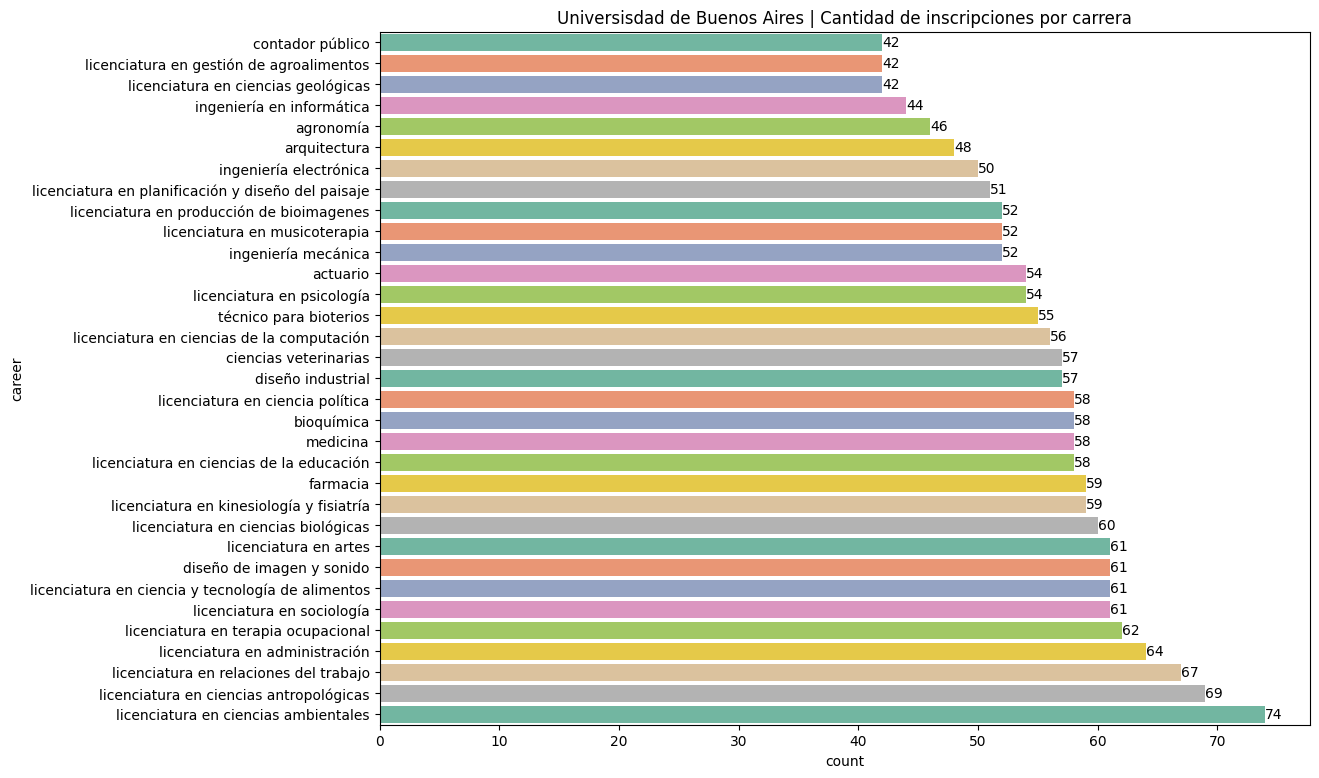

In [4]:
# Generador de graficos de barra simple

def chart_generator(df, name, columns:list, group):
    plt.figure(figsize=(12,9))
    plt.title(name)
    df_carrera = df[columns].groupby(group).count().sort_values(columns[1])
    ax = sns.countplot(data=df, y='career', order=df_carrera.index, palette="Set2")
    ax.bar_label(ax.containers[0])

    return plt.show()

chart_generator(df_bs,
                "Universisdad de Buenos Aires | Cantidad de inscripciones por carrera",
                ['career','university'],
                'career')


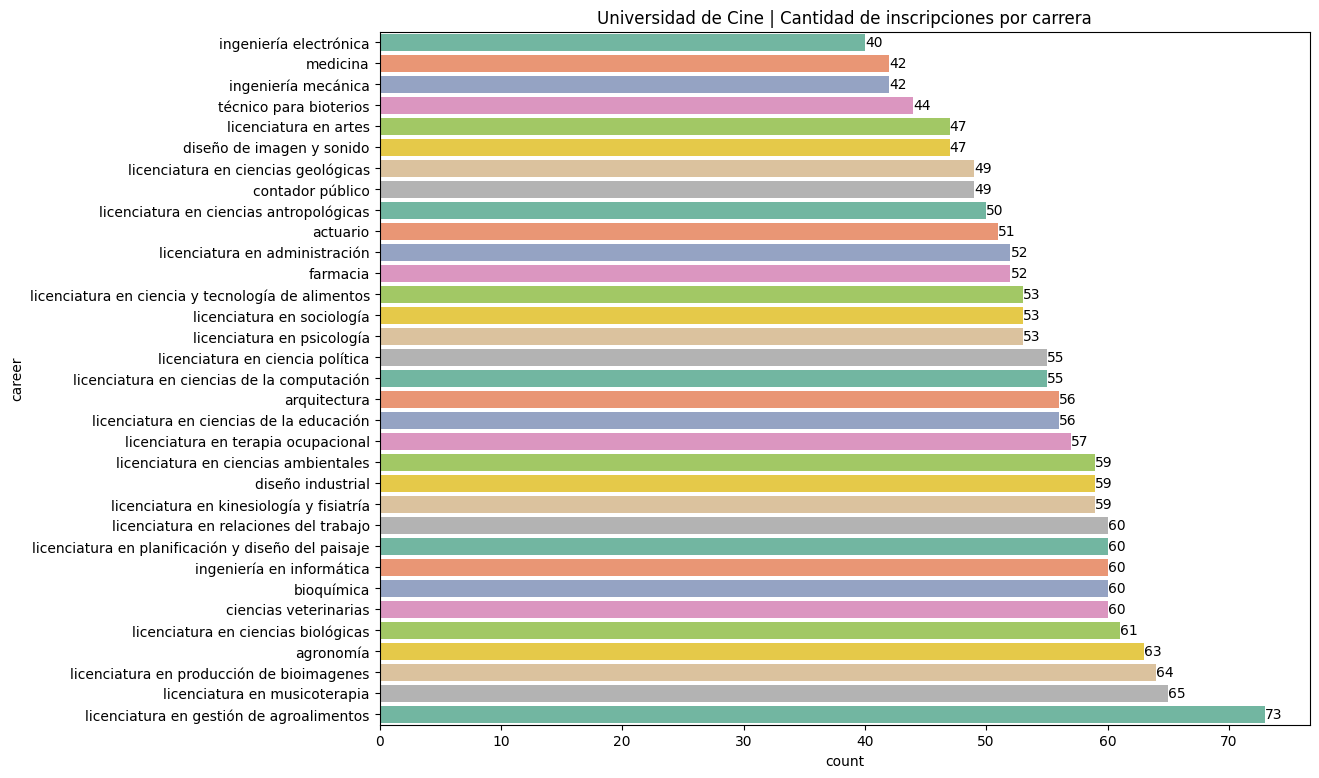

In [5]:
chart_generator(df_cine,
                "Universidad de Cine | Cantidad de inscripciones por carrera",
                ['career','university'],
                'career')


#### Edad:

,age_group
+ 90,0.315934
60-70,0.118132
70-80,0.093407
80-90,0.088462
30-40,0.086264


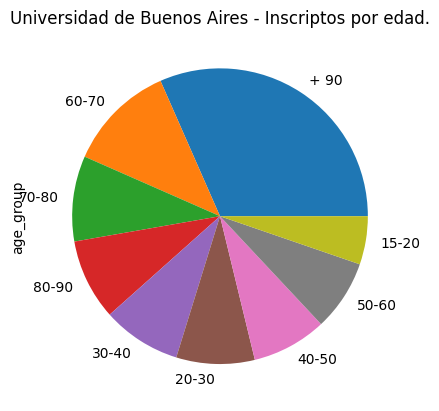

In [6]:
# Edades
def age_chart_generator(df,column, name):
    df['age_group'] = pd.cut(
                            df[column],
                            bins=[15, 20, 30, 40, 50, 60, 70, 80, 90, 200],
                            right=True,
                            labels=['15-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '+ 90',]
                            )

    df_age_group= pd.DataFrame(df['age_group'].value_counts('career'))

    display(df_age_group.head())

    return df_age_group['age_group'].plot(kind='pie',title={name}, subplots=True)

df_age_bs = age_chart_generator(df_bs,'age',"Universidad de Buenos Aires - Inscriptos por edad.")


,age_group
50-60,0.223339
+ 90,0.207705
20-30,0.093244
60-70,0.093244
30-40,0.092686


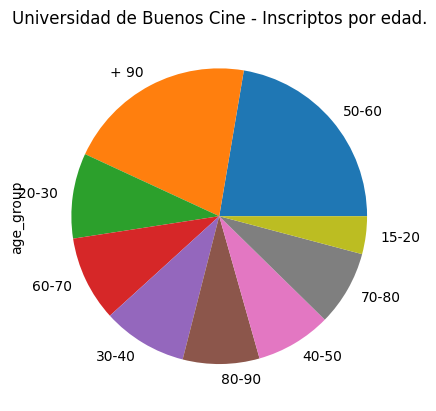

In [7]:
df_age_bs = age_chart_generator(df_cine,'age',"Universidad de Buenos Cine - Inscriptos por edad.")

#### Sexo:

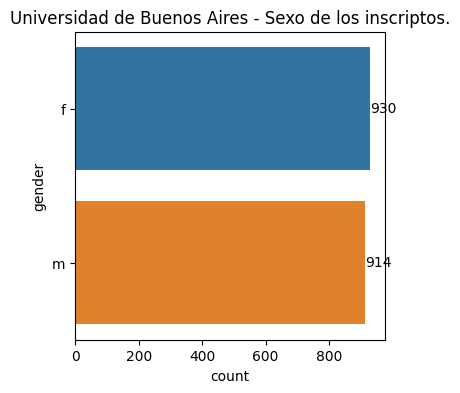

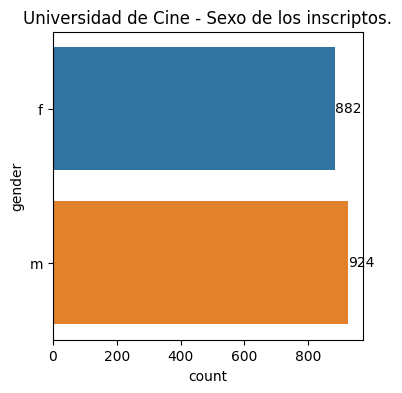

In [8]:
def gender_chart_generator(df,name, y):
    plt.figure(figsize=(4,4))
    plt.title(name)
    df_gender = sns.countplot(data=df, y=y)
    df_gender.bar_label(df_gender.containers[0], label_type='edge')
    return plt.show()

gender_chart_generator(df_bs, "Universidad de Buenos Aires - Sexo de los inscriptos.", 'gender')
gender_chart_generator(df_cine, "Universidad de Cine - Sexo de los inscriptos.", 'gender')


#### Localidad:

- Universidad de Buenos Aires

"Atención, con el objetivo de poder visualizar de mejor manera los datos se quitaron del grafico todas las localidades cuya cantidad de estudiantes es menor a 3, se puede observar en la siguiente tabla, que fueron agrupadas como 'otras': "

,location,students
0,otras,1551
690,desvio kilometro 55,7
567,chovet,6
906,membrillar,5
566,cholila,5
749,estacion coronel pringles,5
363,baterias,5
315,balcosna,5
608,colonia españa,5
275,arturo almaraz,5


<AxesSubplot: title={'center': 'Universidad de Buenos Aires - Estudiantes por localidad.'}, xlabel='students', ylabel='location'>

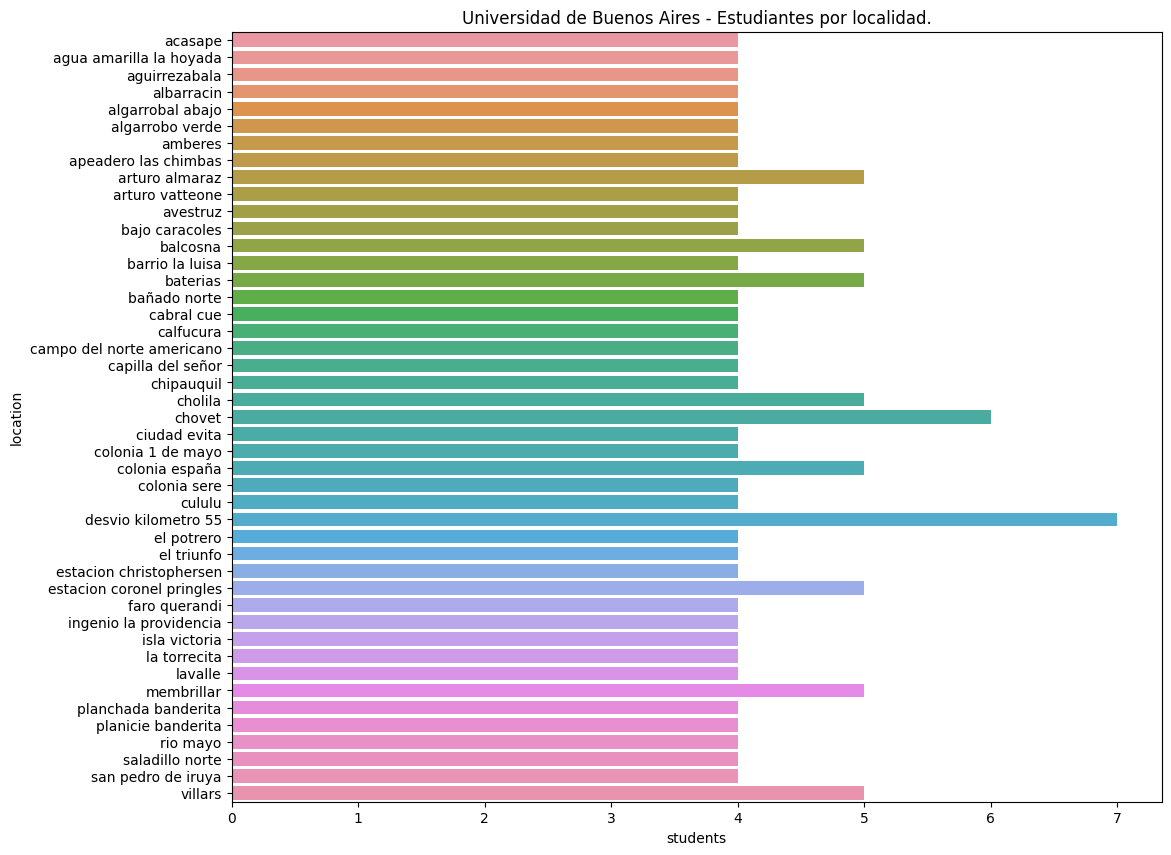

In [9]:
# Datos por localidad

bs_location_df = pd.DataFrame(df_bs.groupby('location')['career'].count())
bs_location_df.reset_index(inplace=True)

otras = bs_location_df.query('career < 4')['career'].sum()

otros = pd.DataFrame({"location":'otras', 'students':[int(otras)]})


bs_location_df = bs_location_df.query("career >= 4")

bs_location_df = bs_location_df.rename(columns={'career':'students'})

location = pd.concat([bs_location_df,otros])

display("Atención, con el objetivo de poder visualizar de mejor manera los datos se quitaron del grafico todas las localidades cuya cantidad de estudiantes es menor a 3, se puede observar en la siguiente tabla, que fueron agrupadas como 'otras': ")
display(location.sort_values('students', ascending=False))

plt.figure(figsize=(12,10))
plt.title("Universidad de Buenos Aires - Estudiantes por localidad.")
sns.barplot(bs_location_df, y='location', x='students')


- Universidad de Cine

"Atención, con el objetivo de poder visualizar de mejor manera los datos se quitaron del grafico todas las localidades cuya cantidad de estudiantes es menor a 3, se puede observar en la siguiente tabla, que fueron agrupadas como 'otras': "

,location,students
0,otras,1551
426,buena vista,8
22,9 de julio,7
310,atreuco,7
192,alto verde,7
...,...,...
498,campo san jose,4
504,cangallo,4
518,caraguatay,4
648,colonia lia y allende,4


<AxesSubplot: title={'center': 'Universidad de Cine - Estudiantes por localidad.'}, xlabel='students', ylabel='location'>

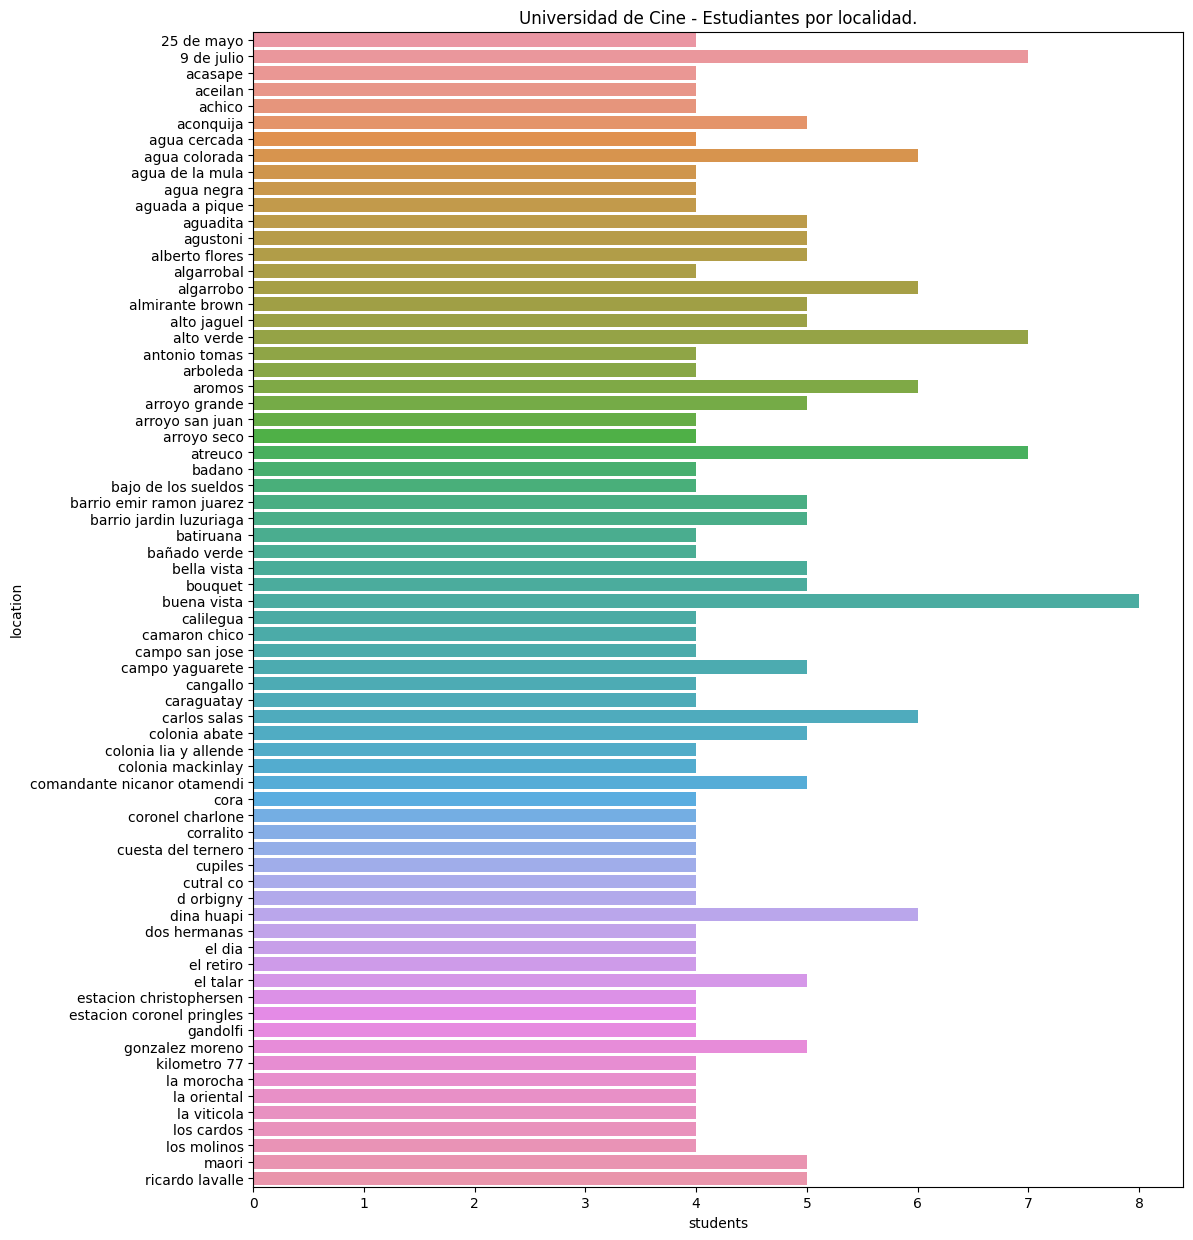

In [10]:
# Datos por localidad

cine_location_df = pd.DataFrame(df_cine.groupby('location')['career'].count())
cine_location_df.reset_index(inplace=True)

otras_cine = cine_location_df.query('career < 4')['career'].sum()

otros_cine = pd.DataFrame({"location":'otras', 'students':[int(otras)]})


cine_location_df = cine_location_df.query("career >= 4")

cine_location_df = cine_location_df.rename(columns={'career':'students'})

cine_location = pd.concat([cine_location_df,otros_cine])

display("Atención, con el objetivo de poder visualizar de mejor manera los datos se quitaron del grafico todas las localidades cuya cantidad de estudiantes es menor a 3, se puede observar en la siguiente tabla, que fueron agrupadas como 'otras': ")
display(cine_location.sort_values('students', ascending=False))

plt.figure(figsize=(12,15))
plt.title("Universidad de Cine - Estudiantes por localidad.")
sns.barplot(cine_location_df, y='location', x='students')


#### Comparacion

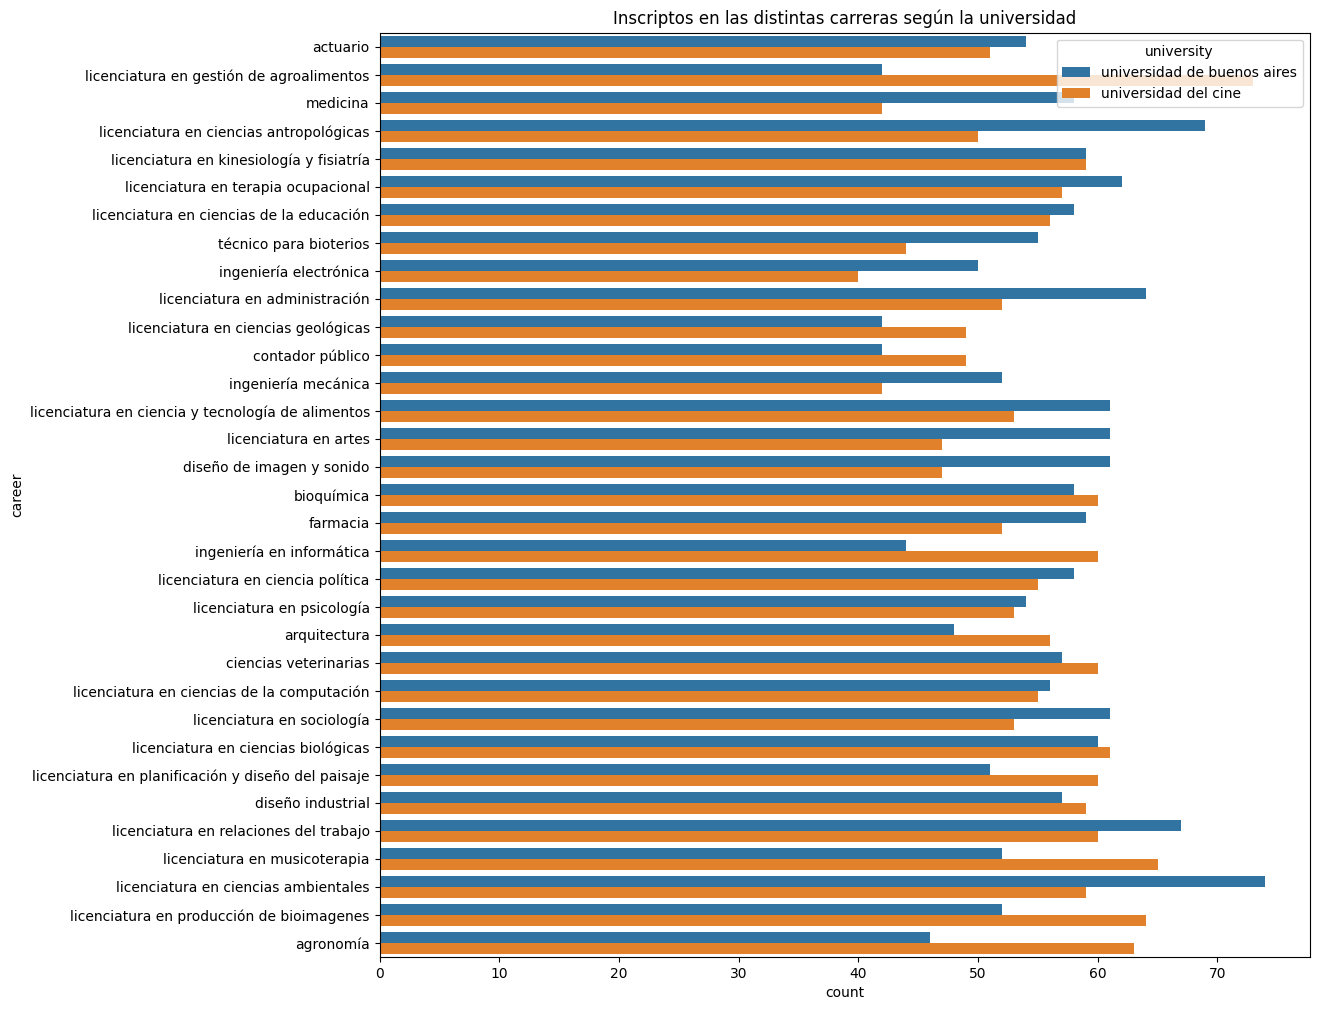

In [11]:
df_gral = pd.concat([df_bs,df_cine])

plt.figure(figsize=(12,12))
plt.title("Inscriptos en las distintas carreras según la universidad")
sns.countplot(data=df_gral, y='career', hue='university')
plt.show()

<AxesSubplot: title={'center': 'Inscripción en las distintas carreras discriminado por sexo. - Universidad de Buenos Aires'}, xlabel='count', ylabel='career'>

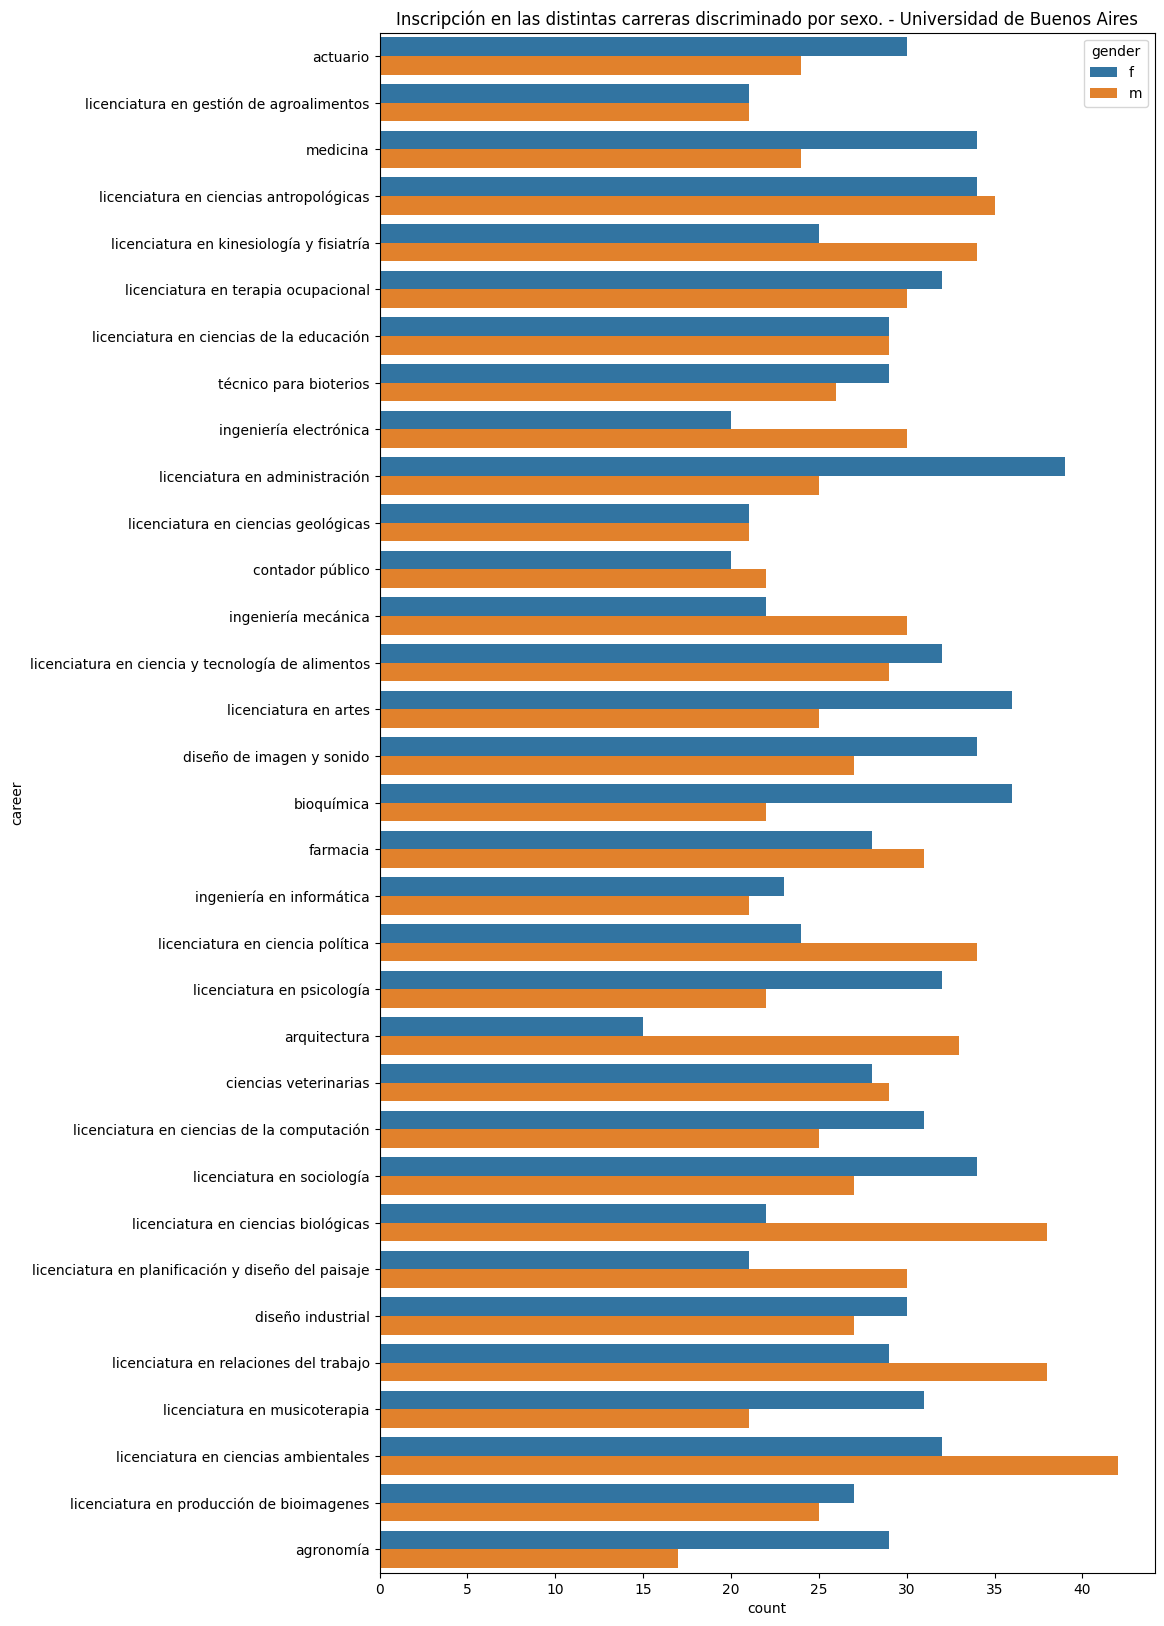

In [12]:


plt.figure(figsize=(10,20))
plt.title("Inscripción en las distintas carreras discriminado por sexo. - Universidad de Buenos Aires")
sns.countplot(df_bs, y='career', hue='gender')

<AxesSubplot: title={'center': 'Inscripción en las distintas carreras discriminado por sexo. - Universidad de Buenos Aires'}, xlabel='count', ylabel='career'>

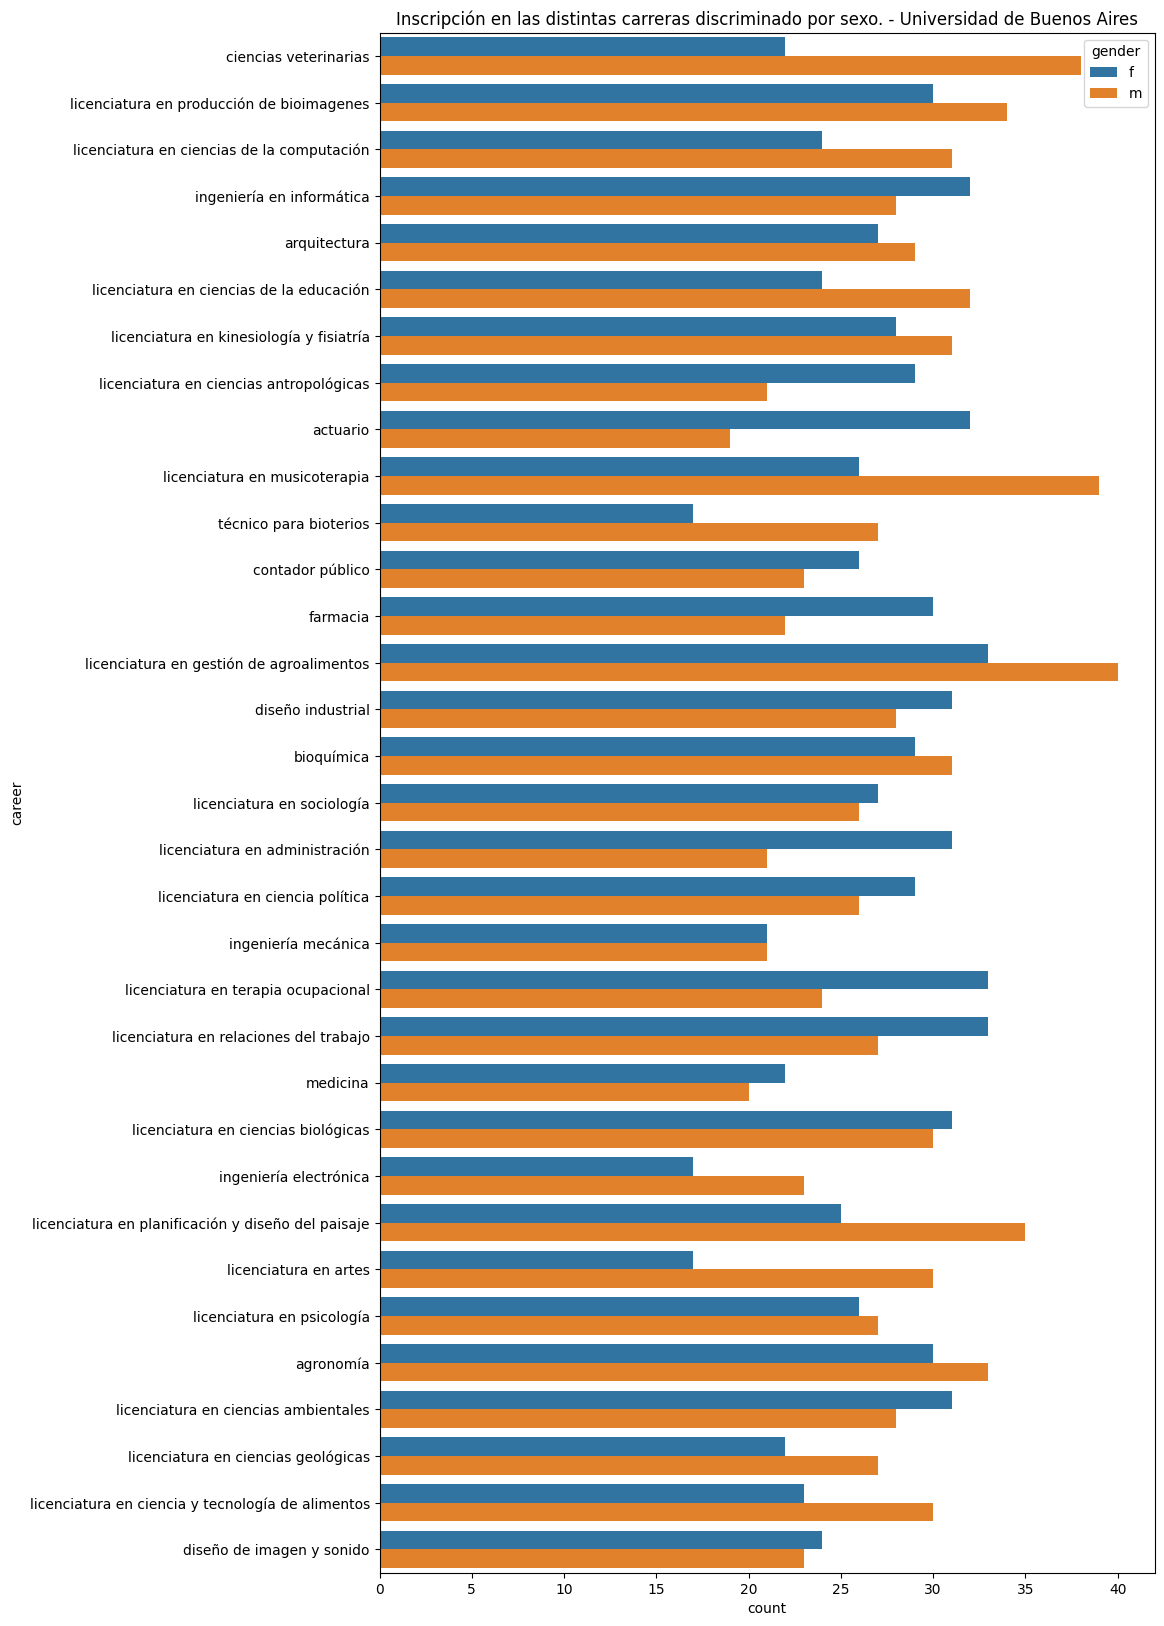

In [13]:


plt.figure(figsize=(10,20))
plt.title("Inscripción en las distintas carreras discriminado por sexo. - Universidad de Buenos Aires")
sns.countplot(df_cine, y='career', hue='gender')

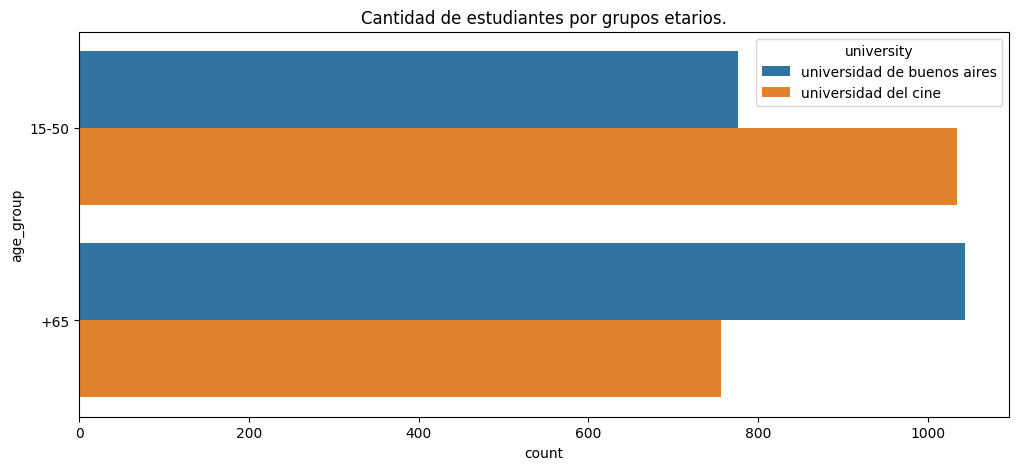

In [14]:

df_gral['age_group'] = pd.cut(df_gral['age'], bins=[15,65,200], right=True, labels=['15-65', '+65'])

plt.figure(figsize=(12,5))
plt.title('Cantidad de estudiantes por grupos etarios.')
sns.countplot(data=df_gral, y='age_group', hue='university')
plt.show()

### Distribucion de los estudiantes en las 3 carreras más concurridas según su edad en la Universidad de buenos Aires:

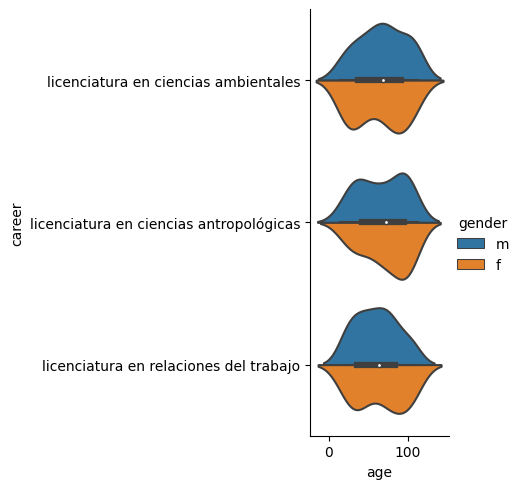

In [20]:

# Datos por localidad

# Obtenemos las 3 carreas mas estudiadas:
career_df = df_bs.groupby('career').count()['university'].reset_index().sort_values('university', ascending=False)

list_career = career_df['career'].to_list()

list_career

concat_list = []

for i in list_career[:3]:
    concat_list.append(
        pd.DataFrame(df_bs.query(f"career == '{i}'"))
    )

correlacion = pd.concat(concat_list)

sns.catplot(
    data=correlacion,
    x="age", y="career", kind="violin", hue='gender', split=True
)
plt.show()


### Distribucion de los estudiantes en las 3 carreras más concurridas según su edad en la Universidad de Cine:

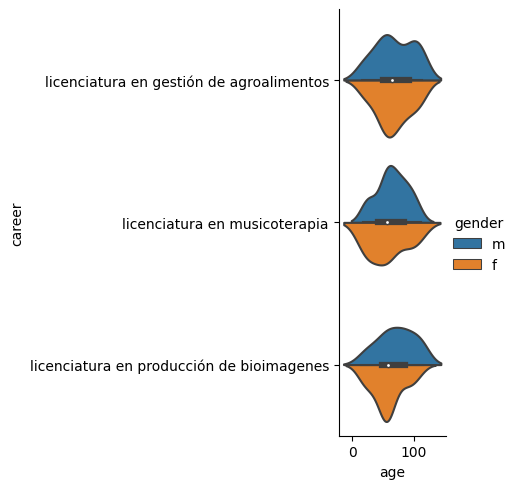

In [28]:

# Datos por localidad

# Obtenemos las 3 carreas mas estudiadas:
career_df = df_cine.groupby('career').count()['university'].reset_index().sort_values('university', ascending=False)

list_career = career_df['career'].to_list()

list_career

concat_list = []

for i in list_career[:3]:
    concat_list.append(
        pd.DataFrame(df_cine.query(f"career == '{i}'"))
    )

correlacion = pd.concat(concat_list)

sns.catplot(
    data=correlacion,
    x="age", y="career", kind="violin", hue='gender', split=True)
plt.show()

### Conclusiones:

- Los datos de ambas universidades son muy similares entre si.
- Existe una proporsion muy grande de inscriptos adultos mayores, incluso en muchos casos teniendo una edad muy avanzada, superando comodamente la esperanza de vida promedio de los habitantes de nuestro pais.
- La distribucion de estudiantes según su sexualidad se encuentra distribuida de forma muy uniforme.
- Los cantidad de estudiantes por carrera es muy similares en ambas universidades, y todas tienen buena concurrencia.
- Ocurre una situación particular con las localidades de los habitantes, estas se encuentran muy dispersas,de forma tal que la localidad que más estuiantes presenta tiene un numero de 8.
- La univeridad, cuyos estudiantes tienen una edad avanzada es la la de Buenos Aires, presentando un numero mayor (+200) a la Universidad de Cine, que si bien tiene mayor cantidad de estudiantes menos a 65 años, presenta un numero considerable de adultos mayores.
